In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**sepreting attributes and labels**

In [ ]:
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
# print attributes and labels
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

**AS EACH COLUMN HAS DIFFERENT RANGE OF VALUES SO NEED TO STANDARISED THE VALUE**

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print (standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
# check mean and standered deviation are 0 and 1
df = pd.DataFrame(standardized_data)
round(df.describe(),2)

,0,1,2,3,4,5,6,7
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.14,-3.78,-3.57,-1.29,-0.69,-4.06,-1.19,-1.04
25%,-0.84,-0.69,-0.37,-1.29,-0.69,-0.60,-0.69,-0.79
50%,-0.25,-0.12,0.15,0.15,-0.43,0.00,-0.30,-0.36
75%,0.64,0.61,0.56,0.72,0.41,0.58,0.47,0.66
max,3.91,2.44,2.73,4.92,6.65,4.46,5.88,4.06


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**split dataset into train test split**

In [ ]:
[X_train,X_test,Y_train,Y_test] = train_test_split(X,Y,train_size=0.7,stratify=Y,random_state=5)
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (537, 8) (231, 8)


**print model and train model**

In [ ]:
# import model|
classifier = svm.SVC(kernel='linear')

In [ ]:
# now train model on the training data|
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# Accuracy score on training data
X_train_prediction = classifier.predict(X_train)
X_training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy score of training data : ',X_training_data_accuracy)

Accuracy score of training data :  0.7970204841713222


In [ ]:
# count value of each class (0 and 1) in training dataset
Y_train.value_counts()

,count
Outcome,
0,350
1,187


In [ ]:
# confusion matrix
cm=confusion_matrix(X_train_prediction,Y_train)
print(cm)

[[315  74]
 [ 35 113]]


In [ ]:
# Generate classification Report
print(classification_report(X_train_prediction,Y_train))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       389
           1       0.60      0.76      0.67       148

    accuracy                           0.80       537
   macro avg       0.75      0.79      0.76       537
weighted avg       0.82      0.80      0.80       537



In [ ]:
# SVM model performance on test data
X_test_prediction = classifier.predict(X_test)
X_testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of testing data : ',X_testing_data_accuracy)

Accuracy score of testing data :  0.7662337662337663


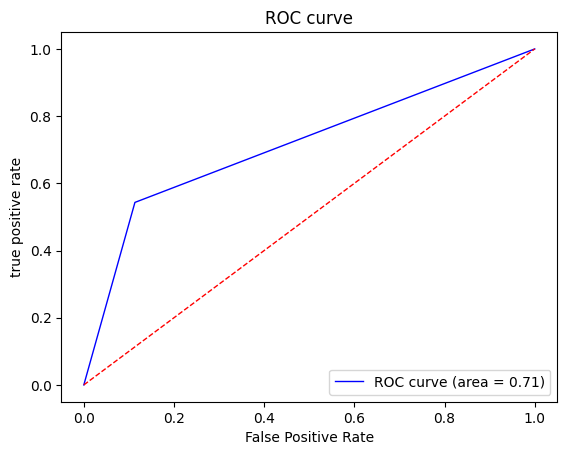

In [ ]:
# draw AUC-ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, X_test_prediction)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='red',lw=1,linestyle='--')
plt.ylabel('true positive rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**NOW MAKING PREDICTIVE MODEL**

In [ ]:
unseen_data = (0,91,80,0,0,32.4,0.601,27)  # DATA is in list format
# convert unseen data into numpy array
unseen_data_as_numpy_array = np.asarray(unseen_data)
unseen_data_reshaped = unseen_data_as_numpy_array.reshape(1,-1)
# standardize the unseen data
std_data = scaler.transform(unseen_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[-1.14185152 -0.93561349  0.56322275 -1.28821221 -0.69289057  0.05170968
   0.38996889 -0.53102292]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
unseen_data = (6,148,72,35,0,33.6,0.627,50	)  # DATA is in list format
# convert unseen data into numpy array
unseen_data_as_numpy_array = np.asarray(unseen_data)
unseen_data_reshaped = unseen_data_as_numpy_array.reshape(1,-1)
# standardize the unseen data
std_data = scaler.transform(unseen_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
